In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [222]:
import matplotlib

In [21]:
ls

2023-06-10-DCASE-FAD-analysis.ipynb  result.csv


In [22]:
df_fad = pd.read_csv('result.csv')
df_fad

task7_index track system_id  submission_num  \
0            -1  BOTH    devset              -1   
1            -2  BOTH  baseline              -2   
2             3     A   TASys03              96   
3             8     A   TASys08              67   
4             2     A   TASys02              10   
5            11     A   TASys11              84   
6            10     A   TASys10              84   
7             7     A   TASys07              51   
8             6     A   TASys06              51   
9             4     A   TASys04              51   
10            5     A   TASys05              51   
11           25     B   TBSys14             112   
12           26     B   TBSys15             112   
13           28     B   TBSys17             112   
14           27     B   TBSys16             112   
15           35     B   TBSys24             115   
16           29     B   TBSys18               6   
17           20     B   TBSys09              58   
18           15     B   TBSys04              70   
19           14     B   TBSys03              70   
20           40     B   TBSys29              41   
21           13     B   TBSys02              70   
22           19     B   TBSys08              58   
23           12     B   TBSys01              70   
24           22     B   TBSys11              93   
25           30     B   TBSys19               6   
26           41     B   TBSys30             120   
27           38     B   TBSys27              86   
28           36     B   TBSys25              86   
29           34     B   TBSys23              51   
30           39     B   TBSys28              86   
31           18     B   TBSys07              13   
32           33     B   TBSys22              51   
33           37     B   TBSys26              86   
34           31     B   TBSys20              51   
35           32     B   TBSys21              51   
36           42     B   TBSys31              87   
37           16     B   TBSys05             111   

                             label  mean wrt eval  footstep wrt eval  \
0                           DEVSET       2.332063           2.072266   
1                         BASELINE       9.702495           8.108325   
2    Scheibler_LINE_task7_trackA_1       4.776975           8.073028   
3         Yi_SURREY_task7_trackA_1       5.025415           5.104284   
4       Chon_GAUDIO_task7_trackA_1       5.539751           5.958591   
5          Guan_HEU_task7_trackA_2       7.799333           7.685016   
6          Guan_HEU_task7_trackA_1       8.622760          10.142571   
7          Lee_maum_task7_trackA_4       9.882505           6.910102   
8          Lee_maum_task7_trackA_3      12.428768           6.903106   
9          Lee_maum_task7_trackA_1      12.936668           6.923696   
10         Lee_maum_task7_trackA_2      12.946274           7.746723   
11          Jung_KT_task7_trackB_2       5.023286           3.990381   
12          Jung_KT_task7_trackB_4       5.025531           3.103457   
13          Jung_KT_task7_trackB_3       5.230348           3.739057   
14          Jung_KT_task7_trackB_1       5.480366           4.369718   
15         Lee_MARG_task7_trackB_1       6.408645           4.563227   
16       Kamath_NUS_task7_trackB_2       6.753666           7.223490   
17              Chang_HYU_task7b_1       6.898475           5.736354   
18         Xie_SJTU_task7_trackB_3       6.991718           6.948669   
19         Xie_SJTU_task7_trackB_2       6.997917           6.894324   
20      Qianbin_BIT_task7_trackB_1       7.154171           5.679040   
21         Xie_SJTU_task7_trackB_4       7.177040           7.762791   
22              Chang_HYU_task7b_2       7.355583           5.877145   
23         Xie_SJTU_task7_trackB_1       7.406916           6.987163   
24      Chun_Chosun_task7_trackB_2       8.351209           7.265385   
25       Kamath_NUS_task7_trackB_1       9.081275           6.347838   
26      Chung_KAIST_task7_trackB_1       9.191598           6.831959  

In [28]:
categories = ['footstep', 'gunshot', 'keyboard', 'moving_motor_vehicle', 'rain', 'sneeze_cough', 'dog_bark']

In [37]:
df_fad = df_fad.sort_values('mean wrt eval', axis=0, ascending=True)
df_fad = df_fad[df_fad['label'] != 'DEVSET']
df_fad_dedup = df_fad.drop_duplicates('submission_num')
df_fad_dedup['legend'] = df_fad_dedup.apply(lambda row: row['label'].split('_')[1] if "_" in row['label'] else row['label'], axis=1)
df_fad_dedup['std wrt dev'] = df_fad_dedup.apply(
  lambda row: np.array([row[f"{k} wrt dev"] for k in categories]).std(), axis=1)
df_fad_dedup['std wrt eval'] = df_fad_dedup.apply(
  lambda row: np.array([row[f"{k} wrt eval"] for k in categories]).std(), axis=1)

df_fad_dedup

/var/folders/fh/0b80xxrx4r97m_85dxwkcy3r0000gn/T/ipykernel_93882/1477070323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fad_dedup['legend'] = df_fad_dedup.apply(lambda row: row['label'].split('_')[1] if "_" in row['label'] else row['label'], axis=1)
/var/folders/fh/0b80xxrx4r97m_85dxwkcy3r0000gn/T/ipykernel_93882/1477070323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fad_dedup['std wrt dev'] = df_fad_dedup.apply(
/var/folders/fh/0b80xxrx4r97m_85dxwkcy3r0000gn/T/ipykernel_93882/14770703

task7_index track system_id  submission_num  \
2             3     A   TASys03              96   
11           25     B   TBSys14             112   
3             8     A   TASys08              67   
4             2     A   TASys02              10   
15           35     B   TBSys24             115   
16           29     B   TBSys18               6   
17           20     B   TBSys09              58   
18           15     B   TBSys04              70   
20           40     B   TBSys29              41   
5            11     A   TASys11              84   
24           22     B   TBSys11              93   
26           41     B   TBSys30             120   
27           38     B   TBSys27              86   
1            -2  BOTH  baseline              -2   
7             7     A   TASys07              51   
31           18     B   TBSys07              13   
36           42     B   TBSys31              87   
37           16     B   TBSys05             111   

                             label  mean wrt eval  footstep wrt eval  \
2    Scheibler_LINE_task7_trackA_1       4.776975           8.073028   
11          Jung_KT_task7_trackB_2       5.023286           3.990381   
3         Yi_SURREY_task7_trackA_1       5.025415           5.104284   
4       Chon_GAUDIO_task7_trackA_1       5.539751           5.958591   
15         Lee_MARG_task7_trackB_1       6.408645           4.563227   
16       Kamath_NUS_task7_trackB_2       6.753666           7.223490   
17              Chang_HYU_task7b_1       6.898475           5.736354   
18         Xie_SJTU_task7_trackB_3       6.991718           6.948669   
20      Qianbin_BIT_task7_trackB_1       7.154171           5.679040   
5          Guan_HEU_task7_trackA_2       7.799333           7.685016   
24      Chun_Chosun_task7_trackB_2       8.351209           7.265385   
26      Chung_KAIST_task7_trackB_1       9.191598           6.831959   
27  QianXu_BIT&NUDT_Task7_TrackB_2       9.644908           5.899411   
1                         BASELINE       9.702495           8.108325   
7          Lee_maum_task7_trackA_4       9.882505           6.910102   
31       Pillay_CMU_task7_trackB_1      12.034063           6.655686   
36        Bai_JLESS_task7_trackB_1      13.582752           8.662682   
37      Wendner_JKU_task7_trackB_1      15.735654           9.949840   

    gunshot wrt eval  keyboard wrt eval  moving_motor_vehicle wrt eval  ...  \
2           3.654543           2.774999                       7.422251  ...   
11          3.494833           4.074149                      14.860763  ...   
3           5.748332           3.037597                       9.801259  ...   
4           3.021078           4.090442                       6.173064  ...   
15         10.657321           3.900301                      11.602222  ...   
16          7.560541           3.883912                      13.564019  ...   
17          6.406871           4.753049                      18.858939  ...   
18          7.912945           3.599583                      11.621132  ...   
20          6.960115           4.283339                      11.485186  ...   
5           8.531979           4.165485                      17.257867  ...   
24         10.764039           5.601934                      13.940749  ...   
26          7.571927           5.187845                      15.653470  ...   
27         10.771438           5.379813                      14.003714  ...   
1           7.951557           5.230160                      16.106707  ...   
7           7.881178           6.603356                      22.310097  ...   
31         16.268064           5.279427                      16.471194  ...   
36         18.484753           6.728321                      24.094270  ...   
37         15.354375          12.564337                      31.160213  ...   

    footstep wrt dev  gunshot wrt dev  keyboard wrt dev  \
2           5.712964         3.226294          3.415218   
11          2.579542         2.559690        

/var/folders/fh/0b80xxrx4r97m_85dxwkcy3r0000gn/T/ipykernel_93882/836759980.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatterplot.set_yticklabels(df['legend'])


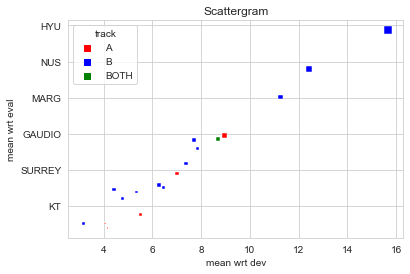

In [49]:
# scattergram
fig, ax = plt.subplots()

# Define marker colors based on 'track' column
colors = {
    'A': 'red',
    'B': 'blue',
    'BOTH': 'green'
}

df = df_fad_dedup


# Set style and create scatter plot
sns.set_style("whitegrid")
scatterplot = sns.scatterplot(
    x='mean wrt dev',
    y='mean wrt eval',
    hue='track',
    palette=colors,  # Color mapping based on 'track' column
    style='track',
    markers={'A': 's', 'B': 's', 'BOTH': 's'},  # Rectangular marker shape
    data=df
)

# Adjust marker sizes based on 'std wrt dev' and 'std wrt eval'
sizes = [w * h for w, h in zip(df['std wrt dev'], df['std wrt eval'])]
scatterplot.collections[0].set_sizes(sizes)

# Set y-axis tick labels as 'legend' column
scatterplot.set_yticklabels(df['legend'])

# Set plot title
scatterplot.set_title('Scattergram')

# Show the plot
plt.show()

/var/folders/fh/0b80xxrx4r97m_85dxwkcy3r0000gn/T/ipykernel_93882/3672937804.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


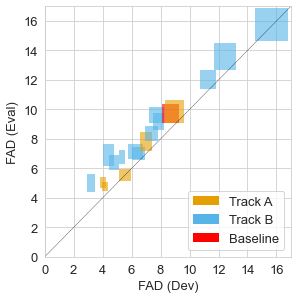

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

matplotlib.rcParams.update({'font.size': 13})
df = df_fad_dedup
# "#E69F00", "#56B4E9", "#009E73"
# Define marker colors based on 'track' column
colors = {
    'A': '#E69F00',
    'B': '#56B4E9',
    'BOTH': 'red'
}

# Create scatter plot
# fig, ax = plt.subplots(figsize=(4, 4))
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0.14, 0.125, 0.855, 0.87])

for i, row in df.iterrows():
    y_label_value = i
    width = 0.3 * row['std wrt dev']
    height = 0.3 * row['std wrt eval']
    color = colors[row['track']]
    x = row['mean wrt dev']
    y = row['mean wrt eval']

    rectangle = Rectangle((x - width/2, y - height/2), width, height, facecolor=color, edgecolor=color,
                         alpha=0.6, linewidth=0)
    ax.add_patch(rectangle)
#     ax.plot([0, x], [y_label_value, y - height/2], color='black', linestyle='-')


# Set y-axis tick labels as 'legend' column
plt.yticks(range(0, 17, 2))
plt.xticks(range(0, 17, 2))

# Set x-axis and y-axis labels
plt.xlabel('FAD (Dev)')
plt.ylabel('FAD (Eval)')

# Set plot title
# plt.title('FAD Score Scatterplot')

# rectangle = Rectangle((1, 1), 2, 2, facecolor=color, edgecolor='black')
# ax.add_patch(rectangle)
ax.plot([0, 17], [0, 17], color='black', linewidth=0.3)
ax.set_xlim(0, 17)
ax.set_ylim(0, 17)
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors['A'], label='Track A', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['B'], label='Track B', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['BOTH'], label='Baseline', linewidth=0)]
ax.legend(handles=legend_elements, loc=4)

# Show the plot
# plt.show()
plt.tight_layout()

plt.savefig('fig-FAD-dev-vs-eval.pdf')


In [204]:
df_subj = pd.DataFrame({
    'submission_num': [-1, -2, 96, 67, 10, 84, 112, 115, 6, 58],
    'WtdAvgAll': [8.818210757, 3.810283883, 6.88802324, 7.076838479, 6.966992056, 5.156481379, 5.534243677, 4.427363684, 4.6470049 ,6.515142762],
    'Audio Quality': [8.629806701, 3.831125779, 6.350562071, 6.757175563,
6.656530771,
4.666920723,
5.082429356,
3.928993982,
3.987934288,
6.085451097],
    'Fit to Category': [9.006614814, 3.789441987, 7.333781743, 7.595634921,
7.153806511,
5.295711296,
5.610322693,
4.442986656,
4.611720819,
6.845262951],
    'Diversity': [np.nan, np.nan, 7.071428571,
6.678571429,
7.214285714,
5.857142857,
6.285714286,
5.392857143,
6.035714286,
6.714285714,
    ],
    'merged_ranking': np.array([0, 9, 3, 1, 2, 6, 5, 8, 7, 4]),
    'track': ['BOTH', 'BOTH', 'A', 'A', 'A', 'A', 'B', 'B', 'B','B']
})
df_subj = df_subj.sort_values('WtdAvgAll', axis=0, ascending=False)
df_subj

submission_num  WtdAvgAll  Audio Quality  Fit to Category  Diversity  \
0              -1   8.818211       8.629807         9.006615        NaN   
3              67   7.076838       6.757176         7.595635   6.678571   
4              10   6.966992       6.656531         7.153807   7.214286   
2              96   6.888023       6.350562         7.333782   7.071429   
9              58   6.515143       6.085451         6.845263   6.714286   
6             112   5.534244       5.082429         5.610323   6.285714   
5              84   5.156481       4.666921         5.295711   5.857143   
8               6   4.647005       3.987934         4.611721   6.035714   
7             115   4.427364       3.928994         4.442987   5.392857   
1              -2   3.810284       3.831126         3.789442        NaN   

   merged_ranking track  
0               0  BOTH  
3               1     A  
4               2     A  
2               3     A  
9               4     B  
6               5     B  
5               6     A  
8               7     B  
7               8     B  
1               9  BOTH

In [205]:
# df_subj.join(df_fad_dedup, on='submission_num', lsuffix='l', rsuffix='r')
df_merged = pd.merge(df_subj, df_fad_dedup, on='submission_num', how='inner')
df_merged


submission_num  WtdAvgAll  Audio Quality  Fit to Category  Diversity  \
0              67   7.076838       6.757176         7.595635   6.678571   
1              10   6.966992       6.656531         7.153807   7.214286   
2              96   6.888023       6.350562         7.333782   7.071429   
3              58   6.515143       6.085451         6.845263   6.714286   
4             112   5.534244       5.082429         5.610323   6.285714   
5              84   5.156481       4.666921         5.295711   5.857143   
6               6   4.647005       3.987934         4.611721   6.035714   
7             115   4.427364       3.928994         4.442987   5.392857   
8              -2   3.810284       3.831126         3.789442        NaN   

   merged_ranking track_x  task7_index track_y system_id  ...  \
0               1       A            8       A   TASys08  ...   
1               2       A            2       A   TASys02  ...   
2               3       A            3       A   TASys03  ...   
3               4       B           20       B   TBSys09  ...   
4               5       B           25       B   TBSys14  ...   
5               6       A           11       A   TASys11  ...   
6               7       B           29       B   TBSys18  ...   
7               8       B           35       B   TBSys24  ...   
8               9    BOTH           -2    BOTH  baseline  ...   

  footstep wrt dev  gunshot wrt dev  keyboard wrt dev  \
0         3.434023         5.795513          3.483430   
1         4.575027         3.782011          6.189678   
2         5.712964         3.226294          3.415218   
3         3.596632         5.311212          2.431532   
4         2.579542         2.559690          2.255365   
5         7.297373         7.627953          4.048936   
6         5.905918         5.648020          4.191617   
7         3.712049         8.207899          3.583927   
8         6.825928         6.151777          5.065154   

   moving_motor_vehicle wrt dev  rain wrt dev  sneeze_cough wrt dev  \
0                      4.674025      5.993922              1.620717   
1                      5.813507      4.745623              2.082841   
2                      5.453252      5.308380              2.252658   
3                     10.176563      3.397926              1.722217   
4                      7.540161      2.625671              1.616554   
5                     12.215824      8.445502              3.452478   
6                      7.233635      7.382954              3.632354   
7                      4.359155      4.386010              1.331548   
8                     11.238814     14.448546              3.563344   

   dog_bark wrt dev    legend  std wrt dev  std wrt eval  
0          3.355148    SURREY     1.429271      2.387607  
1         11.463637    GAUDIO     2.730482      2.785234  
2          3.725835      LINE     1.233800      2.043567  
3          4.317056       HYU     2.588366      5.064357  
4          3.086939        KT     1.827238      4.072392  
5          6.019734       HEU     2.726327      4.249210  
6          3.438254       NUS     1.513073      3.179804  
7          7.778408      MARG     2.253085      3.338890  
8         13.613744  BASELINE     4.022067      4.289289  

[9 rows x 30 columns]

/var/folders/fh/0b80xxrx4r97m_85dxwkcy3r0000gn/T/ipykernel_93882/3095352817.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


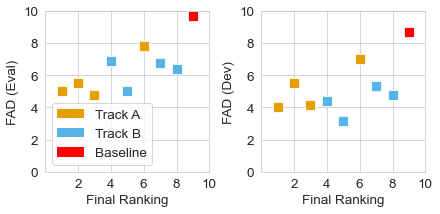

In [354]:
matplotlib.rcParams.update({'font.size': 13.5})

fig = plt.figure(figsize=(6, 2.9))
axs = []
leftmarg = 0.1
axs.append(fig.add_axes([leftmarg, 0.18, 0.38, 0.77]))
axs.append(fig.add_axes([0.5+leftmarg, 0.18, 0.38, 0.77]))


# fig, axs = plt.subplots(1, 2,  figsize=(6, 3.1))


sns.set_style("whitegrid")
scatterplot = sns.scatterplot(
    x='merged_ranking',
    y='mean wrt eval',
    hue='track_x',
    palette=colors,  # Color mapping based on 'track' column
    style='track_x',
    markers={'A': 's', 'B': 's', 'BOTH': 's'},  # Rectangular marker shape
    data=df_merged,
    ax=axs[0],
            s=100

)
# scatterplot.set_title('Ranking vs FAD (eval)')
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors['A'], label='Track A', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['B'], label='Track B', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['BOTH'], label='Baseline', linewidth=0)]
axs[0].legend(handles=legend_elements, loc=0)



sns.set_style("whitegrid")
scatterplot = sns.scatterplot(
    x='merged_ranking',
    y='mean wrt dev',
    hue='track_x',
    palette=colors,  # Color mapping based on 'track' column
    style='track_x',
    markers={'A': 's', 'B': 's', 'BOTH': 's'},  # Rectangular marker shape
    data=df_merged,
    ax=axs[1],
    legend=False,
            s=100

    
)

for ax in axs:
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_xticks([2, 4, 6, 8, 10])

# scatterplot.set_title('Ranking vs FAD (dev)')


axs[0].set_xlabel('Final Ranking')
axs[1].set_xlabel('Final Ranking')

axs[0].set_ylabel('FAD (Eval)')
axs[1].set_ylabel('FAD (Dev)')


# Adjust marker sizes based on 'std wrt dev' and 'std wrt eval'
# sizes = [w * h for w, h in zip(df['std wrt dev'], df['std wrt eval'])]
# scatterplot.collections[0].set_sizes(sizes)

# Set y-axis tick labels as 'legend' column
# scatterplot.set_yticklabels(df['legend'])

# Set plot title

# Show the plot
# plt.show()
# plt.subplots_adjust(left=0.15, bottom=0.14, right=0.9, top=0.98, wspace=0, hspace=0)
plt.tight_layout()

plt.savefig('fig-ranking-vs-scores.pdf')

In [345]:
rank1 = df_merged[:8]['submission_num']
rank2 = df_merged[:8].sort_values('mean wrt eval', ascending=True)['submission_num']
rank3 = df_merged[:8].sort_values('mean wrt dev', ascending=True)['submission_num']

In [184]:
from scipy.stats import spearmanr


In [186]:
spearmanr(rank1, rank2), spearmanr(rank1, rank3)

(SpearmanrResult(correlation=0.2380952380952381, pvalue=0.5701563208157683),
 SpearmanrResult(correlation=0.523809523809524, pvalue=0.18272075053971484))

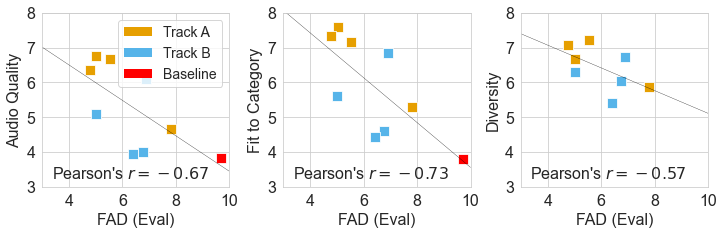

In [350]:
import scipy as sp
matplotlib.rcParams.update({'font.size': 16})

# fig, axs = plt.subplots(1, 3,  figsize=(11, 3.5))
fig = plt.figure(figsize=(10, 3.2))


sns.set_style("whitegrid")


for i, y_name in enumerate(['Audio Quality', 'Fit to Category', 'Diversity']):  # 'WtdAvgAll', 
    if i == 0:
        left, bottom, width, height = 0.05, 0.18, 0.26, 0.78
    elif i == 1:
        left, bottom, width, height = 0.385, 0.18, 0.26, 0.78
    elif i == 2:
        left, bottom, width, height = 0.715, 0.18, 0.26, 0.78
            
    ax = fig.add_axes([left, bottom, width, height])

    _df = df_merged[~df_merged[y_name].isna()]
    scatterplot = sns.scatterplot(
    x='mean wrt eval',
    y=y_name,
    hue='track_x',
    palette=colors,  # Color mapping based on 'track' column
    style='track_x',
    markers={'A': 's', 'B': 's', 'BOTH': 's'},  # Rectangular marker shape
    data=_df,
    ax=ax,
            legend=False,
        s=100

    )
    ax.set_ylim([3, 8])
    ax.set_xlabel("FAD (Eval)")
    #     ax = axs[i]
    ax.set_xlim([3, 10])
    ax.set_xticks([4, 6, 8, 10])
    
    r, p = sp.stats.pearsonr(x=_df["mean wrt eval"], y=_df[y_name])
    plt.text(.05, .05, "Pearson's $r ={:.2f}$".format(r), transform=ax.transAxes)
    
    # line
    m, b = np.polyfit(_df["mean wrt eval"], _df[y_name], 1)
    X_plot = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1],100)
    ax.plot(X_plot, m*X_plot + b, '-', linewidth=0.3, color='black')
    if i == 0:
        legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors['A'], label='Track A', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['B'], label='Track B', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['BOTH'], label='Baseline', linewidth=0)]
        ax.legend(handles=legend_elements, loc=0, fontsize=14)  # , bbox_to_anchor=(0.10, 0.62), 
        

plt.savefig('fig-subjective-vs-objectives.pdf')

In [ ]:
df_subj2 = pd.DataFrame({
    'submission_num': [-1, -2, 96, 67, 10, 84, 112, 115, 6, 58],
    'WtdAvgAll': [8.818210757, 3.810283883, 6.88802324, 7.076838479, 6.966992056, 5.156481379, 5.534243677, 4.427363684, 4.6470049 ,6.515142762],
    'Audio Quality': [8.629806701, 3.831125779, 6.350562071, 6.757175563,
6.656530771,
4.666920723,
5.082429356,
3.928993982,
3.987934288,
6.085451097],
    'Fit to Category': [9.006614814, 3.789441987, 7.333781743, 7.595634921,
7.153806511,
5.295711296,
5.610322693,
4.442986656,
4.611720819,
6.845262951],
    'Diversity': [np.nan, np.nan, 7.071428571,
6.678571429,
7.214285714,
5.857142857,
6.285714286,
5.392857143,
6.035714286,
6.714285714,
    ],
    'merged_ranking': np.array([0, 9, 3, 1, 2, 6, 5, 8, 7, 4]),
    'track': ['BOTH', 'BOTH', 'A', 'A', 'A', 'A', 'B', 'B', 'B','B']
})
df_subj2 = df_subj2.sort_values('WtdAvgAll', axis=0, ascending=False)
df_subj2

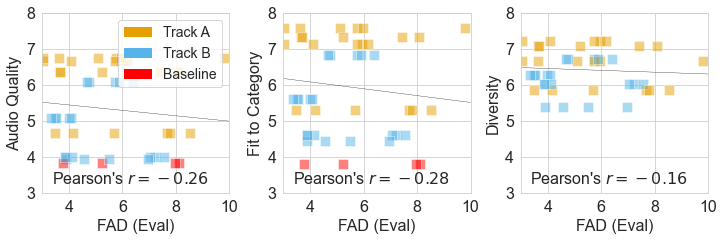

In [364]:
import scipy as sp
matplotlib.rcParams.update({'font.size': 16})

# fig, axs = plt.subplots(1, 3,  figsize=(11, 3.5))
fig = plt.figure(figsize=(10, 3.2))


sns.set_style("whitegrid")


for i, y_name in enumerate(['Audio Quality', 'Fit to Category', 'Diversity']):  # 'WtdAvgAll', 
    if i == 0:
        left, bottom, width, height = 0.05, 0.18, 0.26, 0.78
    elif i == 1:
        left, bottom, width, height = 0.385, 0.18, 0.26, 0.78
    elif i == 2:
        left, bottom, width, height = 0.715, 0.18, 0.26, 0.78
            
    ax = fig.add_axes([left, bottom, width, height])
    
    _df = df_merged[~df_merged[y_name].isna()]
    
    data_x, data_y = [], []
    tracks = []
    
    for name in categories:
        data_x.extend(_df[f'{name} wrt eval'])
        data_y.extend(_df[y_name])
        tracks.extend(_df['track_x'])
    
    __df = pd.DataFrame({"x": data_x, "y": data_y, "track": tracks})
        
    scatterplot = sns.scatterplot(
    x="x",
    y="y",
    hue='track',
    palette=colors,  # Color mapping based on 'track' column
    style='track',
    markers={'A': 's', 'B': 's', 'BOTH': 's'},  # Rectangular marker shape
    data=__df,
    ax=ax,
    legend=False,
        s=100,
        alpha=0.5

    )
    ax.set_ylim([3, 8])
    ax.set_xlabel("FAD (Eval)")
    ax.set_ylabel(y_name)
    #     ax = axs[i]
    ax.set_xlim([3, 10])
    ax.set_xticks([4, 6, 8, 10])
    
    r, p = sp.stats.pearsonr(x=data_x, y=data_y)
    plt.text(.05, .05, "Pearson's $r ={:.2f}$".format(r), transform=ax.transAxes)
    
    # line
    m, b = np.polyfit(data_x, data_y, 1)
    X_plot = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1],100)
    ax.plot(X_plot, m*X_plot + b, '-', linewidth=0.3, color='black')
    if i == 0:
        legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors['A'], label='Track A', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['B'], label='Track B', linewidth=0),
                   plt.Rectangle((0, 0), 1, 1, color=colors['BOTH'], label='Baseline', linewidth=0)]
        ax.legend(handles=legend_elements, loc=0, fontsize=14)  # , bbox_to_anchor=(0.10, 0.62), 
        

plt.savefig('fig-subjective-vs-objectives-all.pdf')